In [136]:
from sim_data import *
import numpy as np

# set seed for reproducibility
np.random.seed(100)

# iIRF parameters
rep_rate = 40
k = 512
fwhm = 0.2

# iIRF only needs to be generated once
# it is measured one time and the sa
# me for all signals
iirf, t = gaussian_irf(rep_rate, k, fwhm)

nonZeroIdx = np.argmin(np.abs(iirf[:int(len(iirf)/2)] - 1/20))
iirf_aligned = 0.5 * np.roll(iirf, -nonZeroIdx)

# number of sets to generate
N = 1000



In [137]:
# fractional contributions and taus randomly generated
# in this case, based on the information in the paper,
# fractional contributions are generated from a uniform distribution between 
# 0 and 100%
# and taus are randomly generated from a uniform distribution between 1 and 6 ns
# and the number of exponential components generated is randomly picked from 1-6
rng = np.random.default_rng(100)
M = rng.integers(low=1, high=6, size=N)
# TODO order fracs and taus correctly for input into gen_signal
parts = [rng.random(m) for m in M]
fracs = [parts[n] / sum(parts[n]) for n in range(N)]
taus = [rng.uniform(low = 1, high = 6, size = m) for m in M]





In [138]:
decays = []
avg_taus = []
for n in range(N):
    decay, t, avg_lts = gen_signal(rep_rate, k, fracs[n], taus[n], iirf)
    noisy_decay = add_white_noise(decay, 20)
    decays.append(noisy_decay)
    avg_taus.append(avg_lts)

In [139]:
import matplotlib.pyplot as plt

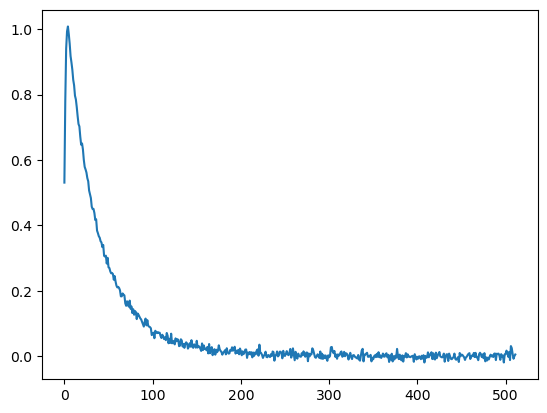

In [140]:

plt.plot(decays[0])

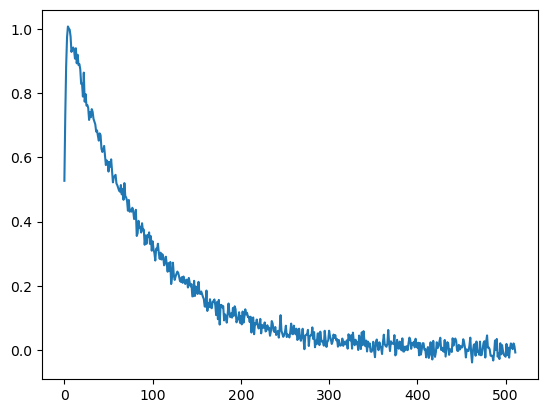

In [141]:
plt.plot(decays[800])

In [142]:
from compute_V import *
from laguerre_basis import *
from compute_tau import * 

In [143]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
alpha = 0.96
L = 4
dt = t[1]
B = basis_array(k, alpha, L)
V = compute_V(k, alpha, L, iirf)
regr = linear_model.LinearRegression()
reg_pred = []
reg_coefs = []
reg_pred_taus = []
inv_pred = []
inv_coefs = []
inv_pred_taus = []
for i in decays:
    regr.fit(V, i)
    reg_pred.append(regr.predict(V))
    reg_coefs.append(regr.coef_)
    reg_pred_taus.append(compute_tau_avg(regr.coef_, dt, B, k) * 1e9)
    chat = np.linalg.inv(np.transpose(V) @ V) @ np.transpose(V) @ i
    inv_coefs.append(chat)
    inv_pred.append( V @ chat)
    inv_pred_taus.append(compute_tau_avg(chat, dt, B, k) * 1e9)

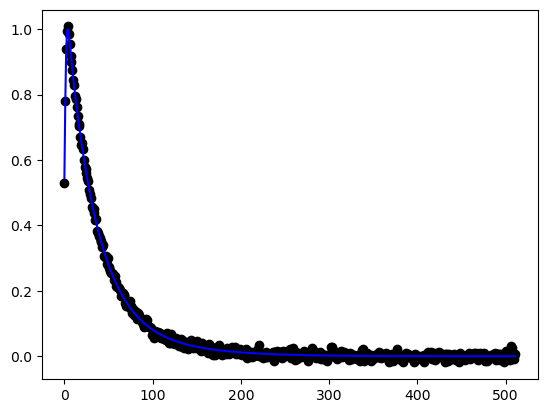

In [145]:
i = 0
plt.plot(np.arange(k), reg_pred[i], color = 'blue')
plt.scatter(np.arange(k), decays[i], color = 'black')

Predicted average Taus vs true average Taus, L = 4, alpha = 0.96

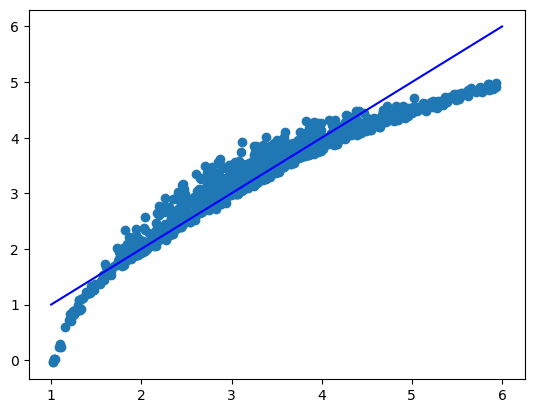

In [146]:
plt.scatter(avg_taus, reg_pred_taus)
plt.plot(np.arange(1,7), np.arange(1,7), 'b')

Predicted Average Taus using inverse solution versus true average taus, L = 4, alpha = 0.96

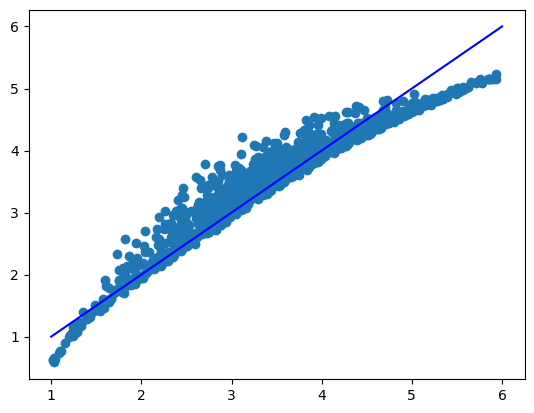

In [147]:
plt.scatter(avg_taus, inv_pred_taus)
plt.plot(np.arange(1,7), np.arange(1,7), 'b')

In [148]:
alpha = 0.92
L = 8
dt = t[1]
B = basis_array(k, alpha, L)
V = compute_V(k, alpha, L, iirf)
regr = linear_model.LinearRegression()
reg_pred = []
reg_coefs = []
reg_pred_taus = []
inv_pred = []
inv_coefs = []
inv_pred_taus = []
for i in decays:
    regr.fit(V, i)
    reg_pred.append(regr.predict(V))
    reg_coefs.append(regr.coef_)
    reg_pred_taus.append(compute_tau_avg(regr.coef_, dt, B, k) * 1e9)
    chat = np.linalg.inv(np.transpose(V) @ V) @ np.transpose(V) @ i
    inv_coefs.append(chat)
    inv_pred.append( V @ chat)
    inv_pred_taus.append(compute_tau_avg(chat, dt, B, k) * 1e9)
    
    

Predicted average Taus vs true average Taus, L = 8, alpha = 0.8


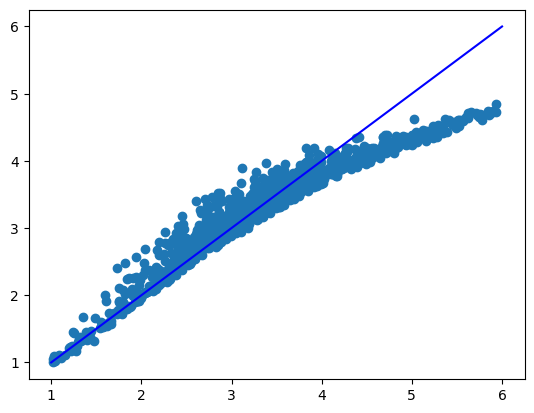

In [149]:
plt.scatter(avg_taus, reg_pred_taus)
plt.plot(np.arange(1,7), np.arange(1,7), 'b')

Predicted Average Taus using inverse solution versus true average taus, L = 8, alpha = 0.8

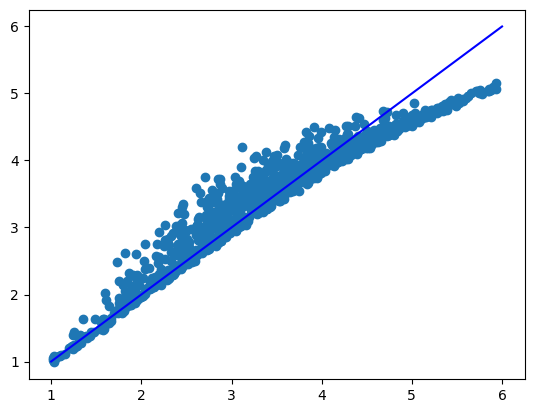

In [150]:
plt.scatter(avg_taus, inv_pred_taus)
plt.plot(np.arange(1,7), np.arange(1,7), 'b')

In [151]:
alpha = 0.92
L = 12
dt = t[1]
B = basis_array(k, alpha, L)
V = compute_V(k, alpha, L, iirf)
regr = linear_model.LinearRegression()
reg_pred = []
reg_coefs = []
reg_pred_taus = []
inv_pred = []
inv_coefs = []
inv_pred_taus = []
for i in decays:
    regr.fit(V, i)
    reg_pred.append(regr.predict(V))
    reg_coefs.append(regr.coef_)
    reg_pred_taus.append(compute_tau_avg(regr.coef_, dt, B, k) * 1e9)
    chat = np.linalg.inv(np.transpose(V) @ V) @ np.transpose(V) @ i
    inv_coefs.append(chat)
    inv_pred.append( V @ chat)
    inv_pred_taus.append(compute_tau_avg(chat, dt, B, k) * 1e9)

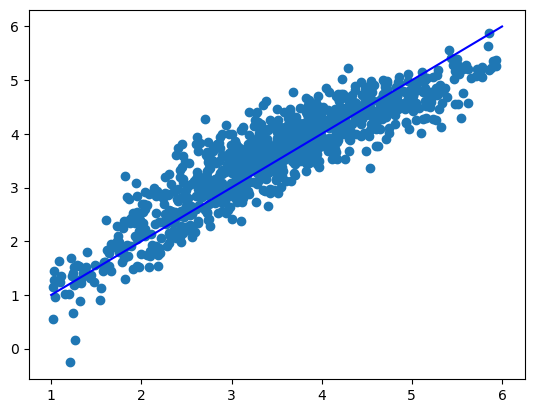

In [152]:
plt.scatter(avg_taus, reg_pred_taus)
plt.plot(np.arange(1,7), np.arange(1,7), 'b')

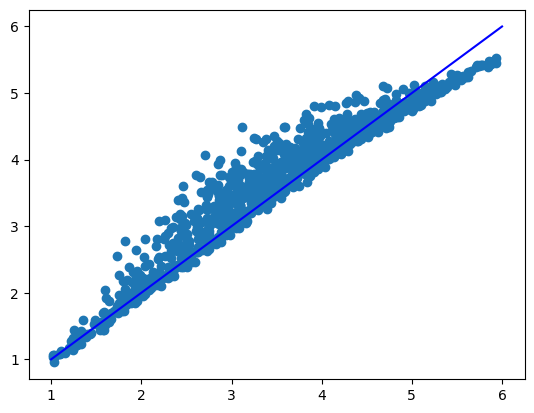

In [153]:
plt.scatter(avg_taus, inv_pred_taus)
plt.plot(np.arange(1,7), np.arange(1,7), 'b')